
# Introduction


## Signal spectrum

A signal is a physical process in time, the parameters of which change in accordance with the transmitted message. Here we will focus on transition between the time and frequency domains for discrete signals.

## Discrete Fourier Transform

To convert a signal from the time domain to the frequency domain and vice versa, it is necessary to perform an operation called the **Discrete Fourier transform**.

We write the formula for the direct Fourier transform for the discrete sequence $x (nT)$. The direct discrete Fourier transform (DFT) is the transformation of the sequence $x (n), n = 0, ..., N – 1 $ into the sequence $X (k), k = 0, ..., N – 1 $according to the following formula:

$X(k) = \sum_{n=0}^{N-1}x(nT)\cdot e^{(-2\pi j\cdot nk/N)} = \sum_{n=0}^{N-1}x(nT)\cdot W^{-nk}$  

where $𝑘 = 0, ..., 𝑁 − 1$.

$𝑁$ - the number of decomposition components, the number of signal values ​​measured over a period;  
$𝑛$ - reference number of the sampled signal, n = 0,1, ..., N – 1;  
$𝑘$ - Is the harmonic number of the transformation component, and T is the period of time during which the input data was taken;  

- $W = e^{-2\pi j / N}$ - rotary factor.

In this formula, $X(kT) = X(e^{j\omega T})$
is the spectral density (spectrum) of a discrete sequence. The expression for the spectrum of a discrete sequence can be found by replacing the variable $z = e^{j\omega T}$  in its Z-form

For **analog signals**, the expression of the sum turns into an integral.

Using the Euler formula  
$e^{j\omega T} = cos(\omega T) + j\cdot sin(\omega T)$,  
one can determine the real and imaginary components, as well as the modulus and argument of spectral density, which are related to the real and imaginary parts of the spectrum through formulas of the theory of functions of a complex variable.

Modulus:  
$|X(kT)| = \sqrt{Re(X)^2 + Im(X)^2}$ 

Phase:  
$arg(X(kT)) = \arctan{\frac{Im(X)}{Re(X)}}$ 


Thus, the DFT for 𝑁  
The input samples of the signal associates N spectral samples. From the DFT formula, to calculate one spectral reference, N operations of complex multiplication and addition are required. Since there are N such operations, the total computational complexity of the DFT is $𝑁^2$

### Inverse fourier transform

The inverse discrete Fourier transform (IDFT) is the translation of the sequence $X (k), k = 0, ..., N – 1 $ into the sequence $x (n), n = 0, ..., N – 1$ by the formula:

$x(nT) = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot e^{(2\pi j\cdot nk/N)} = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot W^{nk}$   

where x (n) is the measured sequence at discrete time points, the values of which are the source data for the direct conversion and the output for the inverse X (k) is the N-sequence of complex amplitudes of the sinusoidal signals forming the original signal x (n); sequence values are output for direct conversion and input for inverse

Since the amplitudes of the spectral readings are complex quantities, it is possible to calculate both the amplitude and phase of the signal from them.

As follows from the **Nyquist-Kotelnikov** theorem, the DFT exactly corresponds to the continuous Fourier transform if the transformable function is a function with a limited spectrum, and the sampling frequency $F_d$ should be no less than twice the maximum frequency of the spectrum $F_B$. It should be noted that for the DFT, the rules and properties that were considered for the Z-transformation are valid. The matrix of `k * n` elements can be used to determine the DFT.

### Features of the spectra of discrete signals.

- The spectral density of a discrete signal is a periodic function with a period equal to the sampling frequency.

- If the discrete sequence is real, then the spectral density modulus of such a sequence is an even function, and the argument is an odd frequency function.

- When the spectrum is shifted, $X(e^{j\omega T})$ sequence 𝑥 (𝑛𝑇) along the frequency axis to the right by value we get the spectrum spectrum $Y(e^{j\omega T}) = Y(e^{j(\omega-\psi) T})$ This spectrum corresponds to a complex sequence:

$y(nT) = e^{j\psi nT} \cdot x(nT) = \cos{(\psi nT)} \cdot x(nT) + j \sin{(\psi nT)} \cdot x(nT)$

Spectral shift $X(e^{j\omega T})$
of the sequence $𝑥 (𝑛𝑇)$ along the frequency axis to the left by value occurs by multiplying the sequence $𝑥 (𝑛𝑇)$ by the complex exponent $e^{j\psi nT}$

- When shifting a discrete signal $𝑥 (𝑛𝑇)$ to the right along the time axis for m clocks (implementation of the delay) we obtain the signal $𝑥 (𝑛) = 𝑥 (𝑛𝑇 − 𝑚𝑇)$ Whose Z-transform and spectral density are of the form:
    
$Z[y(nT)] = Z[x(nT-mT)] = X(z)\cdot z^{-m}$  

$Y(\omega) = e^{-j\omega mT} \cdot X(e^{j\omega T})$  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from scipy import signal
%matplotlib inline

**Example:** Find the modulus and spectral density argument for the following sequence $x (nT) = {1, 2, 0, 1}$.

The scipy library has the fftpack package, which contains the basic functions for calculating DFTs (in particular, FFTs).

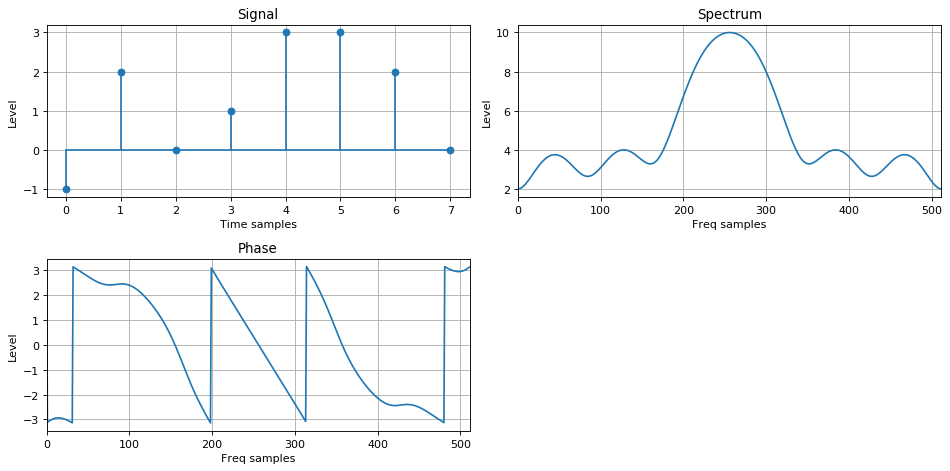

In [4]:
# signal
x = np.array([-1, 2, 0, 1, 3, 3, 2, 0])
# Z-form: X(z) = 1 + 2z^(-1)+z^(-3), where z = exp(-jwT)

# Forward FFT
N = 512
xFFT = fftshift(fft(x, N))

# Magnitude spectrum
xA = np.abs(xFFT)

# Phase spectrum
xF = np.angle(xFFT)

# List of signals
xT = [x, xA, xF]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 2, i+1)
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N-1])
    plt.grid()
plt.tight_layout()

## Discrete Fourier Transform Properties

- **Linearity:** the sum of the spectra of the signals is equal to the spectrum of the sum of the signals.

This property indicates that the spectrum of the sum of independent discrete signals is equal to the sum of the spectra of these signals, and when a discrete signal is multiplied by a constant, its spectrum is also multiplied by this constant.

- **Counting shift (in time)**

A cyclic shift of the signal by m counts leads to a rotation of the phase spectrum, while the amplitude spectrum does not change.

$X'(k) = X(k) \cdot e^{- \frac{2\pi j}{N} k m} $

- **DFT from even and odd functions**

The DFT of an even function degenerates into the cosine Fourier transform

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \cos{(2\pi nk/N)}$

The DFT of an odd function degenerates into a sine Fourier transform

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \sin{(2\pi nk/N)}$

where $𝑘 = 0, ..., 𝑁 − 1$.

- **DFT cyclic convolution signals**

For the signal $𝑥 (𝑛)$, which is the result of the cyclic convolution of two signals 𝑎 (𝑏) and 𝑏 (𝑛):

$x(n) = \sum_{m=0}^{N-1}a(n)\cdot b(n-m)$

The N-point DFT of the sequence is:

$X(k) = A(k) \cdot B(k)$ ,  where 𝐴 (𝑘), 𝐵 (𝑘)

- **signal spectra.**

Thus, the spectrum of cyclic convolution of two signals is equal to the product of the spectra of these signals. This property allows the use of fast DFT algorithms to compute convolution.

- **DFT signal production**

For the signal $𝑥 (𝑛)$, which is the result of the product of two signals 𝑎 (𝑏) and 𝑏 (𝑛) spectrum is equal to:

$X(k) = \frac{1}{N} \sum_{m=0}^{N-1}A(m)\cdot B(k-m)$

The spectrum of the product of two signals is a cyclic convolution of the spectra of these signals.

- **Frequency shift**

Similar to the second property (time shift), if there is a spectrum shifted in frequency by m, $𝑋 (𝑘 – 𝑚)$
, then after DFT, the sequence $𝑥 (𝑛)$ takes the following form:

$x'(n) = x(n)\cdot e^{\frac{2\pi j}{N} k m}$ 

It follows that the shift of the spectrum is carried out by multiplying the signal by a complex exponent. This is used to carry frequencies over a range. Note that after multiplying by the exponent, the signal will be complex, and its spectrum will cease to be symmetrical.

- **Parseval's theorem**

The average power of the discretized time function is equal to the sum of the powers of the individual spectral components and does not depend on their phases.

Normalized signal energy $x(n)^2$

is equal to:

$\sum_{n=0}^{N-1}x^{2}(n) = \frac{1}{N} \sum_{n=0}^{N-1} |{X^{2}(k)}|$  

As can be seen, the properties of the DFT have the duality property, which consists in the fact that all the properties of the DFT are valid both for the signal and for the spectrum.

## Harmonic spectrum

what a harmonic signal looks like ? For this, we set the FFT length `N = 32` counts. Let's see what happens when calculating the IFFT for a signal that is specified in the frequency domain as a unit at a certain position.

Please note that the direct FFT is calculated, since the operations of the FFT and the IFFT are equivalent and differ by a constant and a sign in the rotation factors.

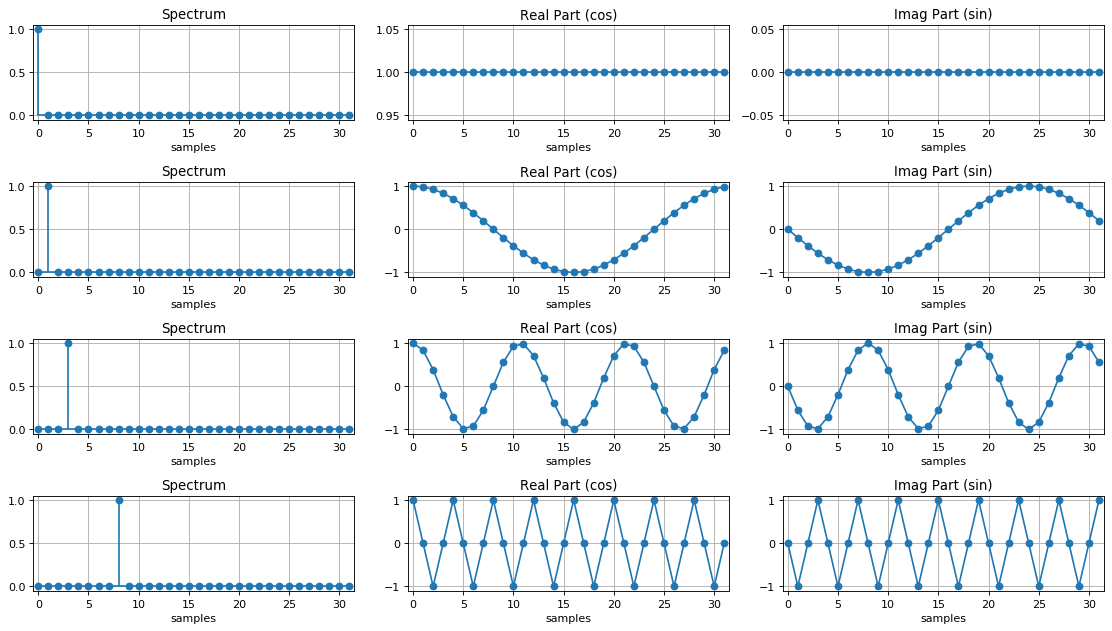

In [3]:
N, M = 32, 4

# Create freq signal
x = np.zeros((N,M))
x[0][0] = 1
x[1][1] = 1
x[3][2] = 1
x[8][3] = 1

# Calculate FFT
X = fft(x, axis=0)

# Plot results
fig = plt.figure(figsize=(14, 8), dpi=80)
for i in range(M*3):
    plt.subplot(4, 3, i+1)
    if i % 3 == 0:
        plt.title('Spectrum')
        plt.stem(x[:,i//3], use_line_collection=True, basefmt='C0')
    if (i-1) % 3 == 0:
        plt.title('Real Part (cos)')
        plt.plot(np.real(X[:,i//3]), '-o')
    if (i-2) % 3 == 0:
        plt.title('Imag Part (sin)')
        plt.plot(np.imag(X[:,i//3]), '-o')      
    plt.xlim([-0.5, N-0.5])
    plt.xlabel('samples')
    plt.grid()
plt.tight_layout()

### Spectrum of the sum of harmonic signals

We show how the spectrum of the sum of harmonic signals looks like (the additive law works: the spectrum of the sum of signals is equal to the sum of the spectra of signals).

The signal consists of three harmonic components.  
Harmonic amplitudes: `A1, A2, A3 = 5, 1, 3`

Harmonic frequencies: `f1, f2, f3 = 2, 7, 12`

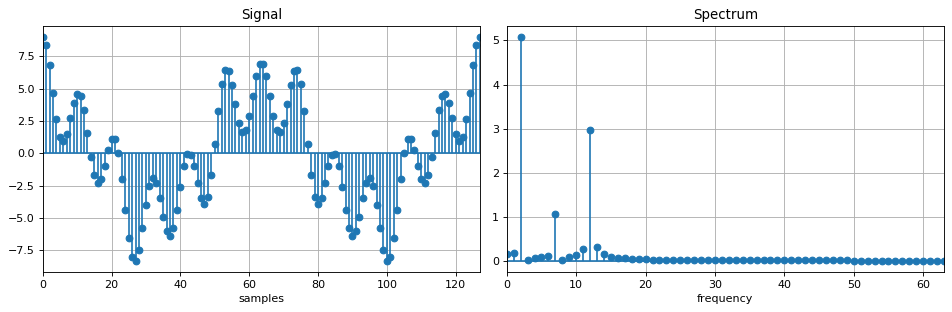

In [5]:
N = 128
# Time vector
t = np.linspace(0, 1, N)

# Amplitudes and freqs
f1, f2, f3 = 2, 7, 12
A1, A2, A3 = 5, 1, 3

# Signal
x = A1 * np.cos(2*np.pi*f1*t) + A2 * np.cos(2*np.pi*f2*t) + A3 * np.cos(2*np.pi*f3*t)

# Calculate FFT
X = fft(x)
X = 2*np.abs(X) / N

# Plot results
fig = plt.figure(figsize=(12, 4), dpi=80)
# Time: signal
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(x, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# Freq: Spectrum
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.stem(X, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

### Periodic sequence

Let us see how the spectral density of the periodic sequence $x (nT)$ changes if we repeat it 𝑀
times after a certain number of ticks with a period 𝑁, where 𝑀

- the number of repetitions of a discrete sequence.

As an example, take the sequence $x (nT) = {1, 1, 1}, M = 4, N = 9.$

In [5]:
N = 9    # Signal period
M = 4    # Number of repeats

# Signal
x = np.zeros(N)
x[0:3] = 1
y = np.tile(x, M)
y

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0.])

Max amplitude = sum of ones * M = 12.0


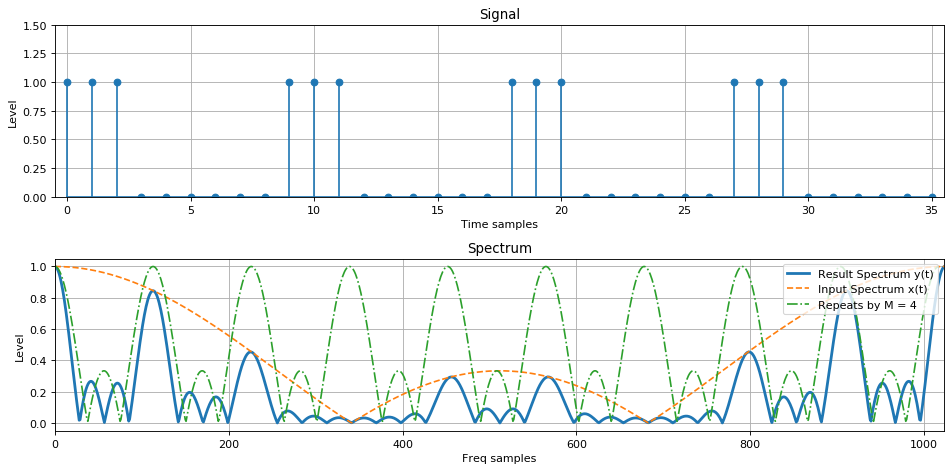

In [6]:
# Forward FFT
NFFT = 1024
xFFT = fft(y, NFFT)

# Magnitude spectrum
yA = np.abs(xFFT)
print('Max amplitude = sum of ones * M = {}'.format(yA.max()))
yA /= np.max(yA)

# Phase spectrum
yF = np.angle(xFFT)


# FFT for input signal
xFFT = fft(x, NFFT)

# Magnitude spectrum
xA = np.abs(xFFT)
xA /= np.max(xA)

# FFT for repeats
xFFT = fft(x, NFFT//N)

# Magnitude spectrum
xM = np.abs(xFFT)
xM /= np.max(xM)
xM = np.tile(xM, N)

#List of signals
xT = [y, yA]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 1, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
        plt.ylim([0, 1.5])
        plt.xlim([-0.5, N*M-0.5])
    else:
        
        plt.plot(sig, '-', linewidth=2.5, label='Result Spectrum y(t)')
        plt.plot(xA, '--', linewidth=1.5, label='Input Spectrum x(t)')
        plt.plot(xM, '-.', linewidth=1.5, label='Repeats by M = %d' % M)
        plt.xlabel('Freq samples')
        plt.xlim([0, NFFT-1])
        plt.legend(loc='upper right')
    plt.grid()
plt.tight_layout()

At zero frequency, the spectrum modulus is numerically equal to the sum of the number of samples of the non-periodic sequence N = 3. After multiplying the two spectra, we obtain the resulting spectrum of the periodic sequence. The signal level at zero frequency is equal to the sum of unit pulses, and since the sequence is periodic, this can be written through the formula:

$A_0 = \sum_{n=0}^{NM}x(nT)$

Thus, in order to obtain the final spectrum of the periodic sequence, it is necessary to do the following steps:

- Divide the interval into N parts (signal period),
- Divide each part of the intervals into M parts (repetition period),
- Find the spectrum modulus of the repetition factor | M (ejωT) |,
- Find the spectrum of the original sequence | X (ejωT) |,
- Multiply Spectra | M (ejωT) | and | X (ejωT) |, obtaining the spectrum of a periodic sequence with period N and the number of repetitions of M.

Rotary factors

DFT matrix coefficients (*twiddle factor*) or rotary factors $𝑊_{𝑛𝑘}$

can be found by the following formula:

$W_{k,n} = e^{\frac{-2\pi j}{N}nk}$  

Thus, the DFT matrix without taking into account the normalizing factor is structured as follows: the first row and column are composed of units, the second row contains roots of a unit of order n in natural order, the following rows are consecutive powers of the second row. As an example, we give a 4x4 matrix.

In [7]:
N = 4
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 3)
print(Wnk)

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.+0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]]


We plot the real and imaginary parts of the matrix of rotating factors for `N = 8`.

[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
   1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.707-0.707j  0.   -1.j    -0.707-0.707j -1.   -0.j
  -0.707+0.707j -0.   +1.j     0.707+0.707j]
 [ 1.   +0.j     0.   -1.j    -1.   -0.j    -0.   +1.j     1.   +0.j
   0.   -1.j    -1.   -0.j    -0.   +1.j   ]
 [ 1.   +0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
   0.707+0.707j  0.   -1.j    -0.707+0.707j]
 [ 1.   +0.j    -1.   -0.j     1.   +0.j    -1.   -0.j     1.   +0.j
  -1.   -0.j     1.   +0.j    -1.   -0.j   ]
 [ 1.   +0.j    -0.707+0.707j  0.   -1.j     0.707+0.707j -1.   -0.j
   0.707-0.707j -0.   +1.j    -0.707-0.707j]
 [ 1.   +0.j    -0.   +1.j    -1.   -0.j     0.   -1.j     1.   +0.j
  -0.   +1.j    -1.   -0.j    -0.   -1.j   ]
 [ 1.   +0.j     0.707+0.707j -0.   +1.j    -0.707+0.707j -1.   -0.j
  -0.707-0.707j -0.   -1.j     0.707-0.707j]]


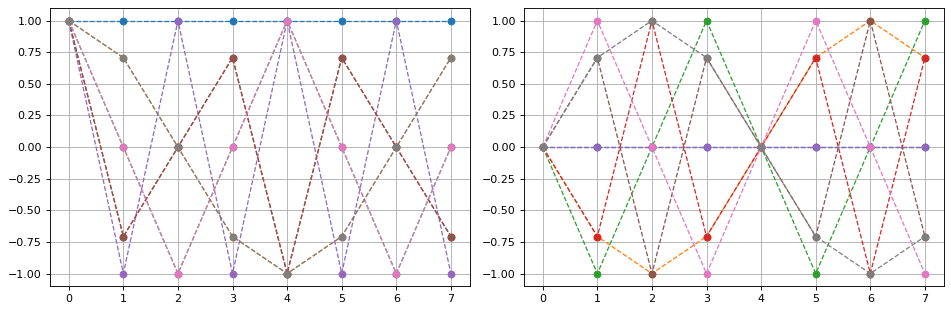

In [8]:
N = 8
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 3)
print(Wnk)

fig = plt.figure(figsize=(12, 4), dpi=80)

plt.subplot(1, 2, 1)
for i in range(N):
    plt.plot(np.real(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.subplot(1, 2, 2)
for i in range(N):
    plt.plot(np.imag(Wnk[i,:]), '--o', linewidth=1.15)
plt.grid(True)
plt.tight_layout()

We plot the real part of the matrix of rotating factors for `N = 16`.

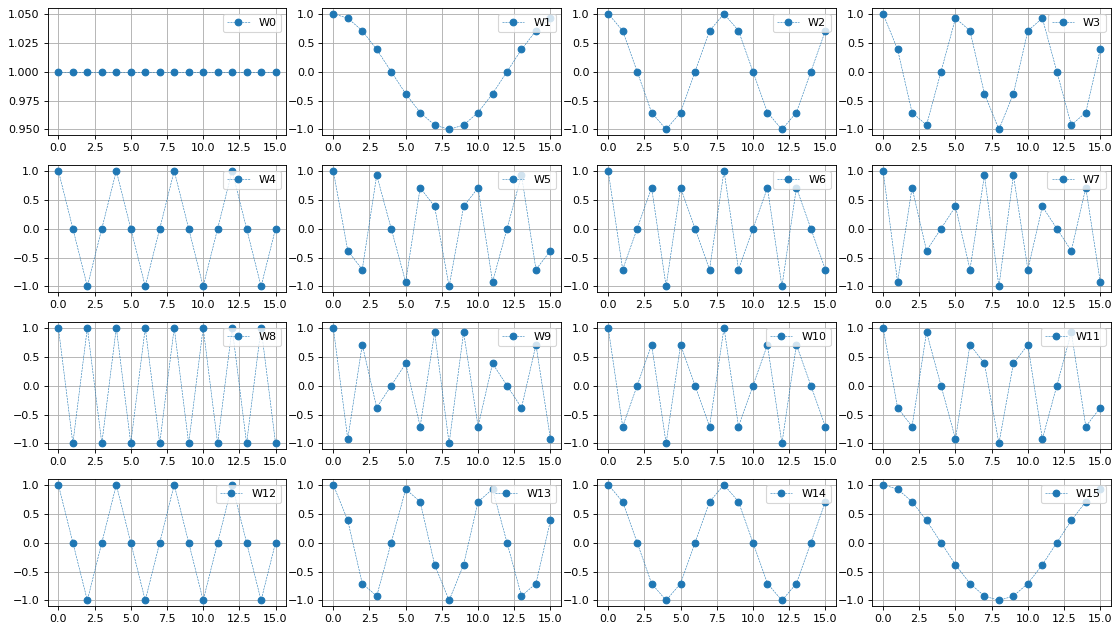

In [9]:
N = 16
nk = np.array([i*j for i in range(N) for j in range(N)]).reshape(N, N)

# Twiddle
Wnk = np.round(np.exp(-2j*np.pi*nk/N), 5)

fig = plt.figure(figsize=(14, 8), dpi=80)
for i in range(N):
    plt.subplot(N//4, 4, i+1)
    plt.plot(np.real(Wnk[i,:]), '--o', linewidth=0.5, label='W{}'.format(i))
    plt.grid(True)
    plt.legend(loc='upper right')
plt.tight_layout()

### Transition from DFT to FFT

The Fourier transform is the basis of convolution methods and the design of digital correlators, is actively used in spectral analysis, and is used when working with long numbers. However, before the advent of computers, DFT was rarely used, since the calculation of DFT even for 64 samples requires 4096 complex multiplication operations and almost the same number of addition operations that it is rather long and laborious to manually calculate. For N = 1024, about a million complex multiplication operations and a million complex multiplication operations are required. The more calculation points (the greater the length of the DFT), the more time is spent on calculations due to an increase in the number of operations.

The calculation of the Fourier transform according to the standard formula involves the execution of a large number of operations of addition and multiplication. Obviously, there is a need to develop algorithms that reduce the number of mathematical operations in calculating the DFT.

It should be noted that calculating the DFT directly is not necessary and you can do with a significantly smaller number of operations. Consider the main idea of the FFT, which consists in splitting the original N-dimensional sequence $𝑥 (𝑛), 𝑛 = 0, ..., 𝑁 – 1$ into parts. In this case, for each part, you can calculate the DFT separately, and then linearly sum with the rest to get the original transformation. In turn, these smaller parts can be divided into even smaller parts, and the same operations can be done.

Let the length of the periodic sequence be 𝑁
then, to calculate one spectral reference, 𝑁 operations of complex multiplication and addition are required. Thus, the total computational complexity of the DFT algorithm is $N^2$ multiplications and additions. If we divide the original sequence into two equal parts in $𝑁 / 2$ elements, then to perform the calculation of the transformation according to the classical formula at each stage, you will need two times less operations of addition and multiplication.

Moreover, each of the N / 2 – point DFTs can also be calculated by replacing 𝑁 / 2
–Point DFT into two 𝑁 / 4 – point ones. In this case, the number of operations of complex addition and multiplication decreases by half. The essence of this DFT algorithm is that you can continue to split the original sequence until an integer division of the sequence into two is possible. It is clear that if the length of the input sequence is 𝑁 = 2𝑚, where 𝑚 is a positive integer, then the original sequence can be divided in half only m times. FFT algorithms with sequence length $𝑁 = 2𝑚$ are called base 2 FFT algorithms (Radix-2 FFT).

The efficiency of the FFT algorithm is completely dependent on the method of splitting and combining the sequence. Obviously, dividing sequences into two parts can be done in different ways, however, it depends on whether we can get an undistorted signal spectrum when combining and what, from the point of view of computational costs and the amount of resource use, it will cost us. The number of FFT operations linearly depends on the sequence length 𝑁
.
### Performance comparison

Below is a table showing a comparison of the effectiveness of FFT algorithms in comparison with DFT. The efficiency of the FFT algorithm and the number of operations performed linearly depends on the sequence length N

<table>
    <thead>
        <tr>
            <th rowspan = 2> N </th>
            <th colspan = 2> DFT </th>
            <th colspan = 2> FFT </th>
            <th rowspan = 2> Ratio of complex additions </th>
            <th rowspan = 2> Ratio of complex multiplications </th>
        </tr>
        <tr>
            <th> Number of multiplication operations </th>
            <th> Number of addition operations </th>
            <th> Number of multiplication operations </th>
            <th> Number of addition operations </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td> 2 </td>
            <td> 4 </td>
            <td> 2 </td>
            <td> 1 </td>
            <td> 2 </td>
            <td> 4 </td>
            <td> 1 </td>
        </tr>
        <tr>
            <td> 4 </td>
            <td> 16 </td>
            <td> 12 </td>
            <td> 4 </td>
            <td> 8 </td>
            <td> 4 </td>
            <td> 1.5 </td>
        </tr>
        <tr>
            <td> 8 </td>
            <td> 64 </td>
            <td> 56 </td>
            <td> 12 </td>
            <td> 24 </td>
            <td> 5.3 </td>
            <td> 2.3 </td>
        </tr>
        <tr>
            <td> 16 </td>
            <td> 256 </td>
            <td> 240 </td>
            <td> 32 </td>
            <td> 64 </td>
            <td> 8 </td>
            <td> 3.75 </td>
        </tr>
        <tr>
            <td> 32 </td>
            <td> 1024 </td>
            <td> 992 </td>
            <td> 80 </td>
            <td> 160 </td>
            <td> 12.8 </td>
            <td> 6.2 </td>
        </tr>
        <tr>
            <td> 64 </td>
            <td> 4096 </td>
            <td> 4032 </td>
            <td> 192 </td>
            <td> 384 </td>
            <td> 21.3 </td>
            <td> 10.5 </td>
        </tr>
        <tr>
            <td> 128 </td>
            <td> 16384 </td>
            <td> 16256 </td>
            <td> 448 </td>
            <td> 896 </td>
            <td> 36.6 </td>
            <td> 18.1 </td>
        </tr>
        <tr>
            <td> ... </td>
            <td> ... </td>
            <td> ... </td>
            <td> ... </td>
            <td> ... </td>
            <td> ... </td>
            <td> ... </td>
        </tr>
        <tr>
            <td> 4096 </td>
            <td> 16777216 </td>
            <td> 16773120 </td>
            <td> 24576 </td>
            <td> 49152 </td>
            <td> 683 </td>
            <td> 341 </td>
        </tr>
        <tr>
            <td> 8192 </td>
            <td> 67108864 </td>
            <td> 67100672 </td>
            <td> 53248 </td>
            <td> 106496 </td>
            <td> 1260 </td>
            <td> 630 </td>
        </tr>
    </tbody>
</table>

The table shows that the use of FFT significantly saves on the number of operations, and the longer the sequence length N, the greater the savings.

For example, for 𝑁 = 8192
counting when calculating the DFT will require 67 million operations of complex addition and multiplication! Using FFT algorithms, you can reduce these numbers by 1260 and 630 times, respectively !!

### FFT Algorithms

There are two main methods for calculating the FFT in base 2 (Radix-2): with decimation (or decimation) in frequency and time. Consider both options.

Consider the first way of splitting a sequence — time decimation, which is also called the FFT Decimation-in-time [DIT] FFT algorithm. The idea is that the original sequence of samples 𝑥 (𝑛)
with length N splits into two sequences 𝑥0 (𝑛) and 𝑥1 (𝑛) of equal length 𝑁 / 2.

Moreover, 𝑥0 (𝑛)

- sequence of even readings -

$x0(n) = x(2n), n = 0, ..., N/2 - 1$  

and 𝑥1 (𝑛)

- a sequence of odd samples -

$x1(n) = x(2n+1), n = 0, ..., N/2 - 1$

Bypassing the mathematical calculations (they can be found in any literature on digital signal processing), we write down the basic rules for calculating the FFT by breaking the sequence into even and odd ones.

FFT algorithm with decimation in time:

- perform binary-inverse permutation of the samples of the input signal, ensuring the splitting of the original sequence;
- do N / 2 Butterfly operations to get the first union using rotary coefficients;
    repeat the operation “Butterfly” to go to the next steps, also using rotary coefficients.

After all the above steps, we get the input sequence at the output of the DFT.

“Butterfly” is a directed graph, with the help of which a pair of complex samples from the previous values ​​is calculated. For FFT with time-thinning, a butterfly on base 2 is written by the formula:

$ X = A + B\cdot W^{-k}_{N}$ 

$ Y = A - B\cdot W^{-k}_{N}$ 

In the FFT algorithm with time decimation, the initial signal was separated in accordance with the binary-inverse permutation into even and odd parts. Thus, we obtain the first and second half of the spectrum. In a frequency decimation algorithm, on the contrary, the original signal is divided in half, and two sequences of spectral readings are obtained at the output — even and odd (therefore, the algorithm is called “decimation in frequency”).

Sample Sequence 𝑥 (𝑛)
with length N splits into two sequences 𝑥0 (𝑛) and 𝑥1 (𝑛) of equal length 𝑁 / 2 .

Moreover, 𝑥0 (𝑛)

- the sequence of the first half of the data -

$x0(n) = x(n), n = 0, ..., N/2 - 1$  

and 𝑥1 (𝑛)

- the sequence of the second half of the data -

$x1(n) = x(n), n = N/2, ..., N - 1$

The fundamental difference between the algorithms is that when thinning in time, multiplication by rotary coefficients was performed after the DFT of an even and odd sequence, and when using decimation in frequency, multiplication is performed before the DFT.

At the same time, the computational efficiency and speed of both algorithms are identical.

FFT algorithm with decimation in frequency:
- do N / 2 Butterfly operations to get the first union using rotary coefficients;
- repeat the operation “Butterfly” to go to the next steps, also using rotary coefficients.
- perform binary-inverse permutation of the resulting signal;

The butterfly in this case looks a little different:

$ X = A + B$ 

$ Y = (A - B)\cdot W^{-k}_{N}$ 


#### Python FFT Library

Python scipy library for computing various Fourier transforms (sine, cosine, direct, inverse, multidimensional, real) contains the fftpack package of the same name. To import a package into a project, you need to run the command:  

```python
from scipy.fftpack import *
# or
from scipy.fftpack import fft, ifft, fftshift
```

#### Signal Convolution

Based on the FFT, the convolution of long sequences can be calculated. This method is used in conditions of limited computing resources (for example, in devices of programmable logic integrated circuits - FPGAs). In the following sections, the task of convolution of sequences will be considered in detail.

### Arbitrary Waveforms

Any arbitrary waveform can be represented as a set of harmonic signals of different frequencies. In other words, a signal of complex shape in the time domain has a set of complex samples in the frequency domain, which are called harmonics. These samples express the amplitude and phase of the harmonic effect at a specific frequency. The larger the set of harmonics in the frequency domain, the more accurately the complex waveform appears.

For example, there is a square waveform. It is required to present it as a sum of harmonic signals. In the following example, we show how the number of frequency complex samples affects the waveform in the time domain.

- Create a square waveform,
- We calculate the FFT of this signal,
- We set the array of frequencies from which the original signal is restored,
- Display the result.

Create a rectangular signal of unit amplitude and calculate its FFT. Length N = 1024 counts. The signal takes zero values ​​at all points except the range [64: 256]. We show how the waveform looks in the time domain if it is selected from the sum of harmonics. For clarity, we present graphs for various values of the set of sums - 3, 10, 30, 90, 200, N / 2. Obviously, from the three harmonics to recreate the exact shape of a rectangular pulse will not work. With a value of 10, the waveform begins to tend toward a rectangular one. With values ​​of 30 and 90, distortions are still visible, in particular at the boundaries of a sharp break in the function. At a value of N / 2, the signal has its original shape (reconstructed from a sufficient set of harmonics for a rectangular pulse).

This means that sudden changes in the signal in the time domain contribute to the upper (high) frequencies of the signal spectrum, and smooth changes in the signal contribute to the lower (low) frequencies of the signal spectrum.

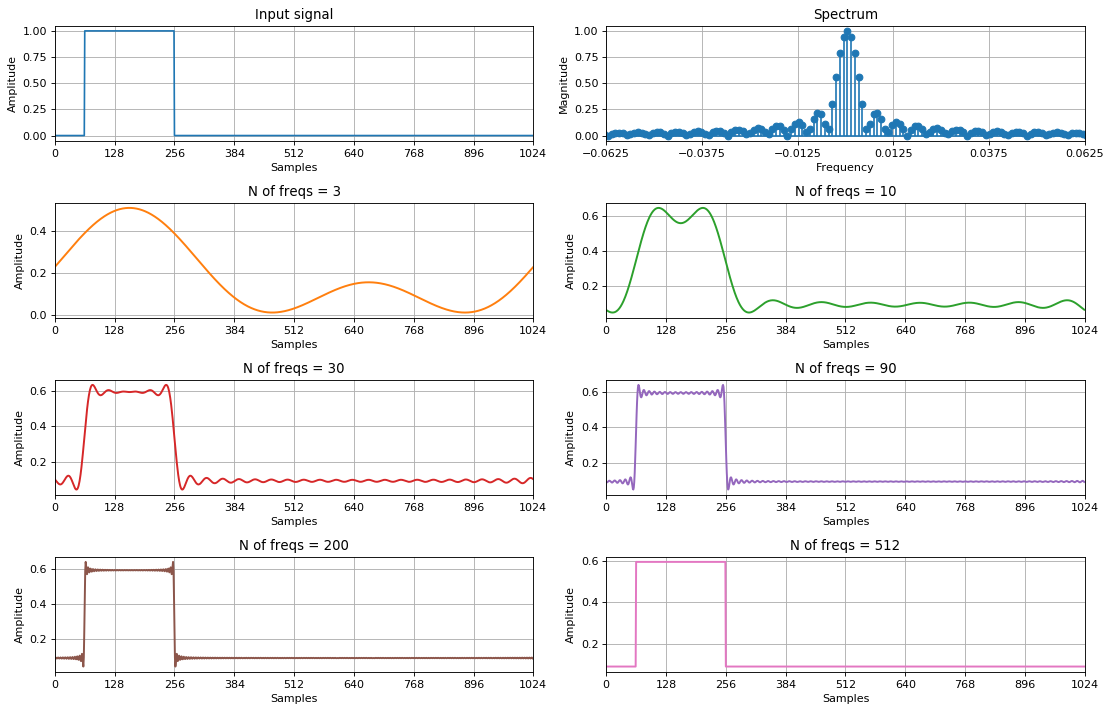

In [10]:
N = 1024
# Create input signal 
x = np.zeros(N)
x[64:256] = 1

# Find Forward FFT
X = fft(x, N)
# Normalized shifted spectrum
Xs = fftshift(np.abs(X))
Xs /= np.max(Xs)
# Normalized frequency
f = np.linspace(-0.5, 0.5, N, endpoint=True)

# Plot input signal in time domain
plt.figure(figsize=(14, 9), dpi=80)
plt.subplot(4, 2, 1)
plt.plot(x)
plt.title('Input signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
plt.grid()

# Plot signal in freq domain
plt.subplot(4, 2, 2)
plt.stem(f, Xs, use_line_collection=True, basefmt='C0')
plt.title('Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim([-1/16, 1/16])
plt.xticks(np.linspace(-1/16, 1/16, 6, endpoint=True))
plt.grid()

# Set the list - number of harmonics
l_freqs = (3, 10, 30, 90, 200, N//2)

# Plot signal with several
for i, j in enumerate(l_freqs):
    plt.subplot(4, 2, i+3)
    K = X.copy()
    K[j:] = 0
    k = np.real(ifft(K))
    plt.plot(k, color='C'+str(i+1), linewidth=1.75)
    plt.title(f'N of freqs = {j}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, N-1])
    plt.xticks(np.linspace(0, N, 9, endpoint=True))
    plt.grid()
plt.tight_layout()
plt.savefig("fig1_gibbs.png")

#### Gibbs effect

The introduced ripple in the region of sharp signal drops is associated with the Gibbs effect. This effect is associated with a consistent approach to the original form in the form of partial sums of the Fourier series. In other words, the nature of the pulsations in the reconstructed signal is directly related to the Gibbs effect. The Gibbs effect is pronounced with sharp violations of the monotony of the function. In sharp changes and jumps, this effect is maximum.

The figure below shows a graph of the reconstruction of a linear signal using a partial sum of the Fourier series for different values ​​of the number of total samples.

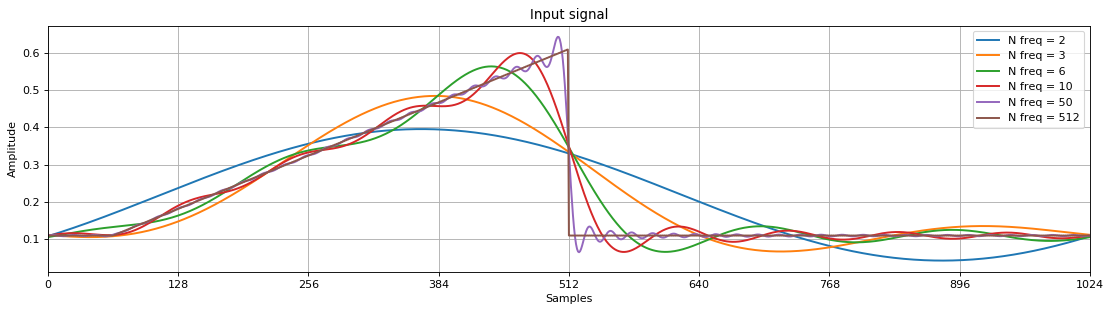

In [11]:
N = 1024
# Create input signal 
x = np.zeros(N)
x[64:512] = np.linspace(0, 1, 512-64)

# Find Forward FFT
X = fft(x, N)

# Set the list - number of harmonics
l_freqs = (2, 3, 6, 10, 50, N//2)

# Plot signal with several
plt.figure(figsize=(14, 4), dpi=80)
plt.title('Input signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim([0, N-1])
plt.xticks(np.linspace(0, N, 9, endpoint=True))
for i, j in enumerate(l_freqs): 
    K = X.copy()
    K[j:] = 0
    k = np.real(ifft(K))
    plt.plot(k, color='C'+str(i), linewidth=1.75, label='N freq = {}'.format(l_freqs[i]))
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("fig2_gibbs.png")

## checking Fourier series on odd functions


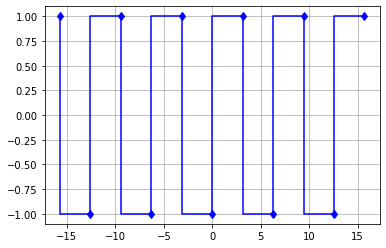

In [24]:
signal_1 = [1 if i % 2 == 0 else -1 for i in range(11) ]
t = np.linspace(-5*np.pi,5*np.pi,11)
plt.plot(t,signal_1, marker='d', color='blue', drawstyle='steps-pre')
plt.grid()


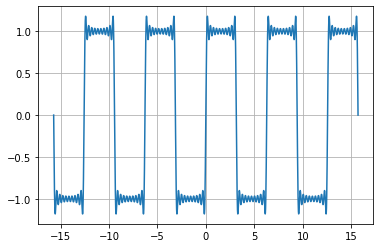

In [17]:
# 4c/(pi*(2i+1)) * sin((2i+1)t)
t = np.linspace(-5*np.pi,5*np.pi,10000)
no_of_terms = 10
sum_fourier = 0
for i in range(no_of_terms):
    sum_fourier += (4/((2*i+1)*np.pi))*np.sin((2*i+1)*t)

plt.plot(t,sum_fourier)
plt.grid()


## checking Fourier series on even functions


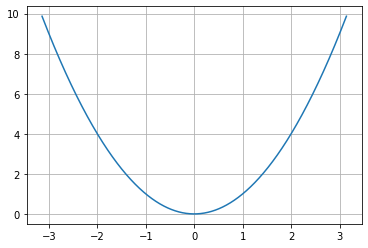

In [26]:
#function in x^2
t = np.linspace(-np.pi,np.pi,10000)
plt.plot(t,t*t)
plt.grid()

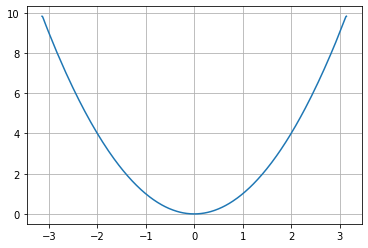

In [28]:
#pi^2/3 + 4*(-1)^ncos(nx)/n^2
#for time period set to -pi to pi
t = np.linspace(-np.pi,np.pi,10000)
a0 = np.pi**2/3
no_of_terms = 100
sum_fourier = a0
for i in range(no_of_terms):
    sum_fourier += (4*(-1)**(i+1)/(i+1)**2)*np.cos((i+1)*t)

plt.plot(t,sum_fourier)
plt.grid()